In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import cv2
import PIL
import tensorflow as tf 
from tensorflow import keras

In [2]:
data_dir = 'flowers'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

WindowsPath('flowers')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

4317

In [6]:
flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
for flower in flowers:
    print("Number of " + flower + " image " + str(len(list(data_dir.glob(flower + '/*')))))

Number of daisy image 764
Number of dandelion image 1052
Number of rose image 784
Number of sunflower image 733
Number of tulip image 984


In [8]:
flowers_label = {
    'daisy': 0,
    'dandelion': 1,
    'rose' : 2,
    'sunflower': 3,
    'tulip': 4
}

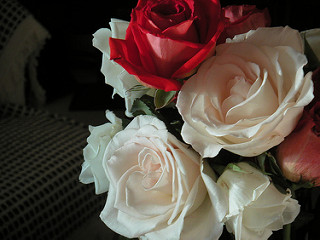

In [9]:
roses = list(data_dir.glob('rose/*'))
PIL.Image.open(roses[1])

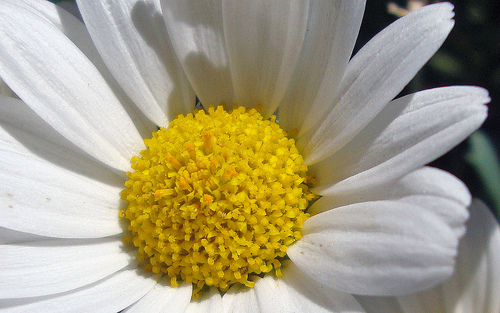

In [10]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[1])

In [11]:
flowers_imagepath_dict = {
    'rose': list(data_dir.glob('rose/*')),
    'dandelian': list(data_dir.glob('dandelian/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'tulip': list(data_dir.glob('tulip/*')),
    'sunflower' : list(data_dir.glob('sunflower/*'))
}

In [12]:
str(flowers_imagepath_dict['rose'][0])

'flowers\\rose\\10090824183_d02c613f10_m.jpg'

In [13]:
# Converting the image into 3D numpy array
img = cv2.imread(str(flowers_imagepath_dict['rose'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
# Resize the image dimension
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [55]:
X = []
Y = []

for flower_name, images in flowers_imagepath_dict.items():
    for img in images:
        img = cv2.imread(str(img))
        resized_img = cv2.resize(img, (180,180))
        Y.append(flowers_label[flower_name])   
        X.append(resized_img)

In [56]:
X = np.array(X)
Y = np.array(Y)

In [57]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_trian, y_test = train_test_split(X,Y,random_state=0)

In [77]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.99)
])

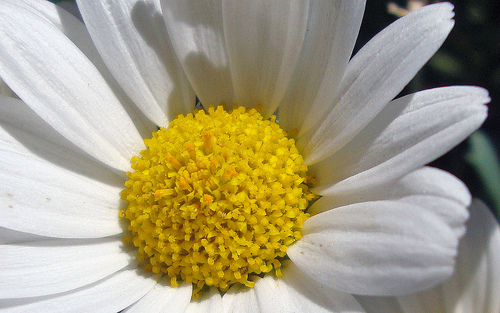

In [78]:
PIL.Image.open(daisy[1])

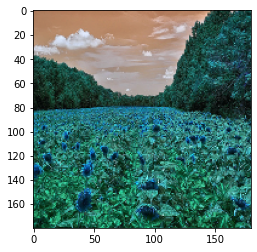

In [80]:
plt.imshow(X_train[0])

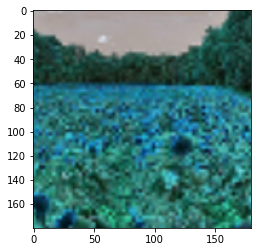

In [81]:
plt.imshow(data_augmentation(X_train)[0].numpy().astype('uint8'))